## 🐾 PET ADOPTION PREDICTOR
### Project Overview
This project aims to build a Machine Learning system capable of predicting how many days an animal will stay in a shelter before being adopted (TimeInShelterDays). The prediction is based on various features such as physical traits, adoption history, and health condition.

Dataset
https://www.kaggle.com/code/edumisvieramartin/prediction-pets-adoption-anns-99-acc/input
### File: pet_adoption_data.csv
### Records: 2,007
### Main Features
1. PetType — Type of animal
2. Breed — Breed of the pet
3. AgeMonths — Pet’s age in months
4. WeightKg — Weight in kilograms
5. Vaccinated — Whether the pet has been vaccinated
6. HealthCondition — Current health status
7. AdoptionFee — Adoption cost
8. PreviousOwner — Indicates if the pet had a previous owner
### Purpose
The resulting model will help animal shelters optimize their adoption strategies by identifying pets at higher risk of long shelter stays. This will allow shelters to improve adoption rates and manage resources more efficiently.

## Información Básica (Columnas, Tipos, nulls, dulplicates) del Dataset
Se importan librerias.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats as stats


Se carga el dataset.

In [2]:
df = pd.read_csv('../data/pet_adoption_data.csv')

Mostramos todas la columnas y las 5 primeras filas del dataframe.

In [3]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


Vemos información de las columnas.

In [4]:
df.shape

(2007, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


Miramos las Columnas.

In [6]:
df.columns

Index(['PetID', 'PetType', 'Breed', 'AgeMonths', 'Color', 'Size', 'WeightKg',
       'Vaccinated', 'HealthCondition', 'TimeInShelterDays', 'AdoptionFee',
       'PreviousOwner', 'AdoptionLikelihood'],
      dtype='object')

Vemos los tipos de columnas que hay en PetType

In [7]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

Recuento del número de animales por PetType.

In [8]:
df['PetType'].value_counts().sort_values(ascending=True)

PetType
Bird      487
Rabbit    493
Cat       505
Dog       522
Name: count, dtype: int64

## Análisis de la Calidad de Datos.
-- Valores nulos, duplicados, outliers --
No hemos encontrado nulos, duplicados ni outliers.

Visualización Duplicados.

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isnull().sum()

PetID                 0
PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

Miramos nulos.

Según el análisis previo los datos están limpios.
No nulos ni duplicados.
Con la tabla limpia hacemos el EDA.

Análisis Exploratorio de Datos.
En esta sesión se realiza el anáisis descriptivo del DataSet.

Recuento de probabilidades de adopción según la columna AdoptionLikelihood.

In [11]:
df['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

Se agrupan los tipos de animales con más probabilidad e adopción.

In [12]:
adoptables = df[df['AdoptionLikelihood'] == 1]
adoptables[['PetType']].value_counts()

PetType
Dog        242
Bird       147
Cat        145
Rabbit     125
Name: count, dtype: int64

Hemos agrupado por condición de salud el tipo de animal.

In [13]:
df[df['HealthCondition'] == 1]['PetType'].value_counts()

PetType
Cat       111
Dog       100
Rabbit     96
Bird       87
Name: count, dtype: int64

Agrupamos según el tipo de animal y la raza.

In [14]:
df[df['HealthCondition'] == 1] \
  .groupby(['PetType', 'Breed']) \
  .size() \
  .sort_values(ascending=False)

PetType  Breed           
Rabbit   Rabbit              96
Bird     Parakeet            87
Cat      Persian             56
         Siamese             55
Dog      Poodle              38
         Labrador            33
         Golden Retriever    29
dtype: int64

In [15]:
medical = df[df['HealthCondition'] == 1]

In [16]:
medical_total = (
    medical
    .groupby(['PetType', 'Breed'])
    .size()
    .rename('TotalWithMedicalCondition')
)

In [17]:
medical_adoptable = (
    medical[medical['AdoptionLikelihood'] == 1]
    .groupby(['PetType', 'Breed'])
    .size()
    .rename('AdoptableWithMedicalCondition')
)

In [18]:
relation = pd.concat(
    [medical_total, medical_adoptable],
    axis=1
).fillna(0)

In [19]:
relation['AdoptionRate'] = (
    relation['AdoptableWithMedicalCondition'] /
    relation['TotalWithMedicalCondition']
) * 100

In [20]:
relation.sort_values(by='AdoptionRate').head(10)

TotalWithMedicalCondition  \
PetType Breed                                         
Cat     Persian                                  56   
Bird    Parakeet                                 87   
Rabbit  Rabbit                                   96   
Cat     Siamese                                  55   
Dog     Golden Retriever                         29   
        Poodle                                   38   
        Labrador                                 33   

                          AdoptableWithMedicalCondition  AdoptionRate  
PetType Breed                                                          
Cat     Persian                                       2      3.571429  
Bird    Parakeet                                      4      4.597701  
Rabbit  Rabbit                                        6      6.250000  
Cat     Siamese                                       4      7.272727  
Dog     Golden Retriever                              5     17.241379  
        Poodle                                        7     18.421053  
        Labrador                                     10     30.303030

In [21]:
relation = (
    df[df['HealthCondition'] == 1]
    .groupby(['PetType', 'Breed'])['AdoptionLikelihood']
    .agg(
        Total='count',
        Adoptable='sum'
    )
)
relation['AdoptionRate'] = relation['Adoptable'] / relation['Total'] * 100

In [22]:
relation.sort_values(by='AdoptionRate').head(10)

Total  Adoptable  AdoptionRate
PetType Breed                                           
Cat     Persian              56          2      3.571429
Bird    Parakeet             87          4      4.597701
Rabbit  Rabbit               96          6      6.250000
Cat     Siamese              55          4      7.272727
Dog     Golden Retriever     29          5     17.241379
        Poodle               38          7     18.421053
        Labrador             33         10     30.303030

## 📊 Análisis Univariante de la Variable Objetivo: TimeInShelterDays

En esta sección, analizamos la distribución de la variable objetivo `TimeInShelterDays` para comprender sus propiedades estadísticas antes de modelar.

Examinaremos:

- Histograma + KDE
- Diagrama de caja
- Diagrama Q-Q
- Estadísticos descriptivos (media, mediana, asimetría, curtosis)

El objetivo es determinar si se requiere una transformación logarítmica antes de entrenar los modelos de regresión.

## 4.1 Distribución: Histograma + Curva KDE

**Objetivo:**  
Visualizar la forma de la distribución de `TimeInShelterDays` para identificar patrones, simetría y posibles sesgos en los datos.

**Metodología:**
Se utiliza un histograma de densidad combinado con una curva de estimación de densidad por kernel (KDE) para obtener una representación suavizada de la distribución. Se incluyen marcadores para la media y mediana para facilitar la comparación y detección de asimetría.

**Elementos del gráfico:**
- **Histograma (barras):** Frecuencia relativa de animales por rango de días
- **Curva KDE (línea):** Estimación suavizada de la densidad de probabilidad
- **Línea roja:** Media aritmética
- **Línea verde:** Mediana (percentil 50)

---

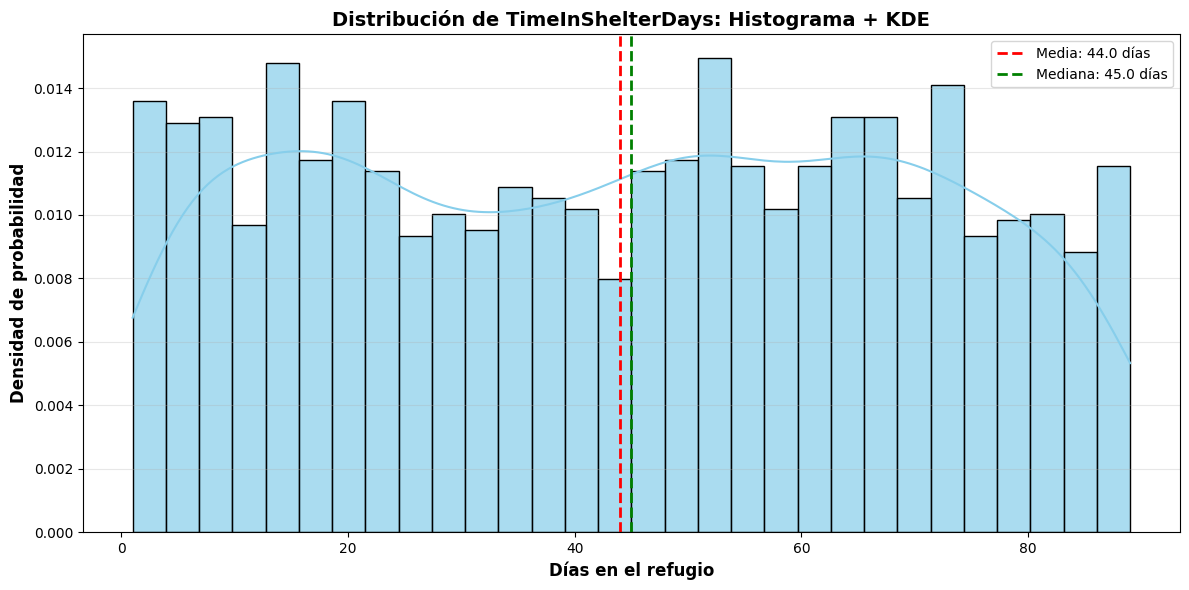

Media:    43.97 días
Mediana:  45.00 días
Diferencia (Media - Mediana): -1.03 días


In [23]:
# ============================================
# Histograma + KDE de TimeInShelterDays
# ============================================

plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='TimeInShelterDays',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black',
    stat='density',
    alpha=0.7
)

media = df['TimeInShelterDays'].mean()
mediana = df['TimeInShelterDays'].median()

plt.axvline(x=media, color='red', linestyle='--', linewidth=2,
            label=f'Media: {media:.1f} días')
plt.axvline(x=mediana, color='green', linestyle='--', linewidth=2,
            label=f'Mediana: {mediana:.1f} días')

plt.xlabel('Días en el refugio', fontsize=12, fontweight='bold')
plt.ylabel('Densidad de probabilidad', fontsize=12, fontweight='bold')
plt.title('Distribución de TimeInShelterDays: Histograma + KDE', 
        fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Media:    {media:.2f} días")
print(f"Mediana:  {mediana:.2f} días")
print(f"Diferencia (Media - Mediana): {media - mediana:.2f} días")

### Interpretación del Histograma + KDE

**Estadísticas clave:**
- **Media:** 43.97 días
- **Mediana:** 45.00 días
- **Diferencia:** -1.03 días (2.3% respecto a la mediana)

**Análisis de la distribución:**

La distribución de `TimeInShelterDays` presenta una forma **multimodal irregular**, con varios picos de frecuencia distribuidos a lo largo del rango de 0 a 100 días. No se observa una forma de campana gaussiana clara.

La diferencia entre media y mediana es mínima (-1.03 días, equivalente al 2.3% de la mediana), lo que sugiere una **distribución aproximadamente simétrica** sin presencia significativa de valores extremos que distorsionen la media hacia un lado.

La media ligeramente inferior a la mediana (Media < Mediana) podría indicar una ligera concentración de valores en el extremo inferior del rango, aunque la diferencia es estadísticamente poco relevante.

**Conclusión preliminar:**

La variable `TimeInShelterDays` no sigue una distribución normal estándar debido a su forma multimodal. Sin embargo, la simetría relativa (diferencia Media-Mediana < 3%) sugiere que no se requiere transformación logarítmica por motivos de sesgo. Se procederá a confirmar esta hipótesis mediante el análisis de skewness y Q-Q plot.

## 4.2 Estadísticas Descriptivas: Skewness y Kurtosis

**Objetivo:**  
Cuantificar las características de forma de la distribución mediante métricas estadísticas complementarias al análisis visual.

**Metodología:**
Se calculan las siguientes métricas para caracterizar la distribución de `TimeInShelterDays`:

- **Desviación estándar (σ):** Medida de dispersión que indica la variabilidad de los datos respecto a la media
- **Coeficiente de variación (CV):** Desviación estándar normalizada respecto a la media (expresada en porcentaje)
- **Skewness (asimetría):** Mide el grado de asimetría de la distribución
  - Skewness ≈ 0: Distribución simétrica
  - Skewness > 1: Asimetría positiva (cola larga hacia la derecha)
  - Skewness < -1: Asimetría negativa (cola larga hacia la izquierda)
- **Kurtosis (apuntamiento):** Mide el grado de concentración de valores en las colas
  - Kurtosis ≈ 0: Distribución mesocúrtica (similar a la normal)
  - Kurtosis > 0: Leptocúrtica (colas más pesadas que la normal)
  - Kurtosis < 0: Platicúrtica (colas más ligeras que la normal)

**Criterio de decisión:**
Se considera necesaria una transformación logarítmica si |Skewness| > 1.

---

In [24]:
# ============================================
# Estadísticas Descriptivas Completas
# ============================================

# Calculamos métricas
media = df['TimeInShelterDays'].mean()
mediana = df['TimeInShelterDays'].median()
std = df['TimeInShelterDays'].std()
skewness = skew(df['TimeInShelterDays'])
kurt = kurtosis(df['TimeInShelterDays'])
coef_variacion = (std / media) * 100

#Visibilidad de los resultados
print("="*70)
print("Estadísticas descriptivas de TimeInShelterDays")
print("="*70)

print(f"\n📊 MEDIDAS DE TENDENCIA CENTRAL:")
print(f"   Media:                    {media:.2f} días")
print(f"   Mediana:                  {mediana:.2f} días")
print(f"   Diferencia (Media-Med):   {media - mediana:.2f} días")

print(f"\n📊 MEDIDAS DE DISPERSIÓN:")
print(f"   Desviación estándar:      {std:.2f} días")
print(f"   Coeficiente de variación: {coef_variacion:.1f}%")

print(f"\n📊 MEDIDAS DE FORMA:")
print(f"   Skewness (asimetría):     {skewness:.3f}")
print(f"   Kurtosis (apuntamiento):  {kurt:.3f}")

print("\n" + "="*70)





Estadísticas descriptivas de TimeInShelterDays

📊 MEDIDAS DE TENDENCIA CENTRAL:
   Media:                    43.97 días
   Mediana:                  45.00 días
   Diferencia (Media-Med):   -1.03 días

📊 MEDIDAS DE DISPERSIÓN:
   Desviación estándar:      25.74 días
   Coeficiente de variación: 58.5%

📊 MEDIDAS DE FORMA:
   Skewness (asimetría):     0.004
   Kurtosis (apuntamiento):  -1.211



### Interpretación de Estadísticas Descriptivas

**Resultados obtenidos:**

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| **Media** | 43.97 días | Tiempo promedio de permanencia |
| **Mediana** | 45.00 días | Valor central (50% adopta antes, 50% después) |
| **Diferencia (Media-Mediana)** | -1.03 días | Simétrica (diferencia < 3%) |
| **Desviación estándar** | 25.74 días | Alta dispersión |
| **Coeficiente de variación** | 58.5% | Alta variabilidad |
| **Skewness** | 0.004 | Perfectamente simétrica |
| **Kurtosis** | -1.211 | Platicúrtica (colas ligeras) |

---

#### 🔍 Análisis de Asimetría (Skewness)

El valor de skewness de **0.004** (≈ 0) indica una distribución **perfectamente simétrica**. Este resultado confirma que la distribución está equilibrada sin sesgo hacia valores altos o bajos.

La diferencia entre media (43.97) y mediana (45.00) es de apenas **-1.03 días** (2.3% de la mediana), lo cual refuerza la conclusión de simetría.

**Clasificación según skewness:**
- |Skewness| < 0.5 → **Distribución simétrica** (nuestro caso: 0.004)
- 0.5 ≤ |Skewness| < 1.0 → Moderadamente sesgada
- |Skewness| ≥ 1.0 → Muy sesgada (requiere transformación logarítmica)

**Conclusión:** No se requiere transformación logarítmica por motivos de asimetría.

---

#### 🔍 Análisis de Apuntamiento (Kurtosis)

El valor de kurtosis de **-1.211** indica una distribución **platicúrtica** (colas ligeras).

**Clasificación según kurtosis:**
- Kurtosis > 1 → Leptocúrtica (colas pesadas, más outliers)
- -1 ≤ Kurtosis ≤ 1 → Mesocúrtica (similar a normal)
- Kurtosis < -1 → **Platicúrtica** (colas ligeras, nuestro caso: -1.211)

**Interpretación:** 
Una distribución platicúrtica presenta **menos valores extremos** (outliers) que una distribución normal, con datos más uniformemente distribuidos a lo largo del rango. Esto es coherente con la forma multimodal observada en el histograma, donde los datos no se concentran marcadamente en el centro sino que se distribuyen en varios picos a lo largo de 0-100 días.

---

#### 🔍 Análisis de Variabilidad

El coeficiente de variación de **58.5%** indica **alta dispersión** relativa en los tiempos de adopción. 

**Rango típico (media ± 1σ):**
- Límite inferior: 43.97 - 25.74 = **18.23 días**
- Límite superior: 43.97 + 25.74 = **69.71 días**
- Aproximadamente el **68%** de los animales se adoptan dentro de este rango

**Implicaciones:**
Esta alta variabilidad sugiere heterogeneidad significativa en el dataset. Los tiempos de adopción varían considerablemente entre animales, posiblemente debido a factores como:
- Tipo de animal (perros, gatos, conejos, aves)
- Edad y tamaño
- Condición de salud
- Características de raza específicas
- Historial previo (con/sin dueño anterior)

Estos factores serán explorados en profundidad en el análisis bivariante

---

#### Decisión sobre Transformación Logarítmica

**Resumen de criterios evaluados:**

| Criterio | Valor | Requiere transformación |
|----------|-------|-------------------------|
| **Skewness** | 0.004 | NO (perfectamente simétrica) |
| **Kurtosis** | -1.211 | NO (indica distribución uniforme) |
| **Diferencia Media-Mediana** | 2.3% | NO (< 5%) |

**Decisión preliminar:** 

No se aplicará transformación logarítmica a la variable `TimeInShelterDays` en la fase de preprocesamiento. Las métricas estadísticas confirman una distribución simétrica sin sesgo significativo.

Esta decisión será validada mediante el análisis de normalidad con Q-Q plot (Sección 4.4).

---

## 4.3 Detección de Outliers: Boxplot

**Objetivo:**  
Identificar valores atípicos (outliers) mediante el método del rango intercuartílico (IQR) y evaluar su impacto potencial en el modelado predictivo.

**Metodología:**

Se utiliza un diagrama de caja y bigotes (boxplot) para visualizar la distribución de `TimeInShelterDays` y detectar valores atípicos mediante el criterio estadístico IQR:

- **Q1 (Percentil 25):** 25% de los datos están por debajo de este valor
- **Q2 (Mediana):** 50% de los datos están por debajo de este valor
- **Q3 (Percentil 75):** 75% de los datos están por debajo de este valor
- **IQR (Rango Intercuartílico):** Q3 - Q1 (contiene el 50% central de los datos)

**Criterio de detección de outliers:**
- **Outliers moderados:** Valores fuera del rango [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
- **Outliers extremos:** Valores fuera del rango [Q1 - 3×IQR, Q3 + 3×IQR]

**Elementos del boxplot:**
- **Caja:** Contiene el 50% central de los datos (entre Q1 y Q3)
- **Línea central:** Mediana (Q2)
- **Bigotes:** Extensión hasta 1.5×IQR desde los bordes de la caja
- **Puntos individuales:** Outliers que caen fuera de los bigotes

---

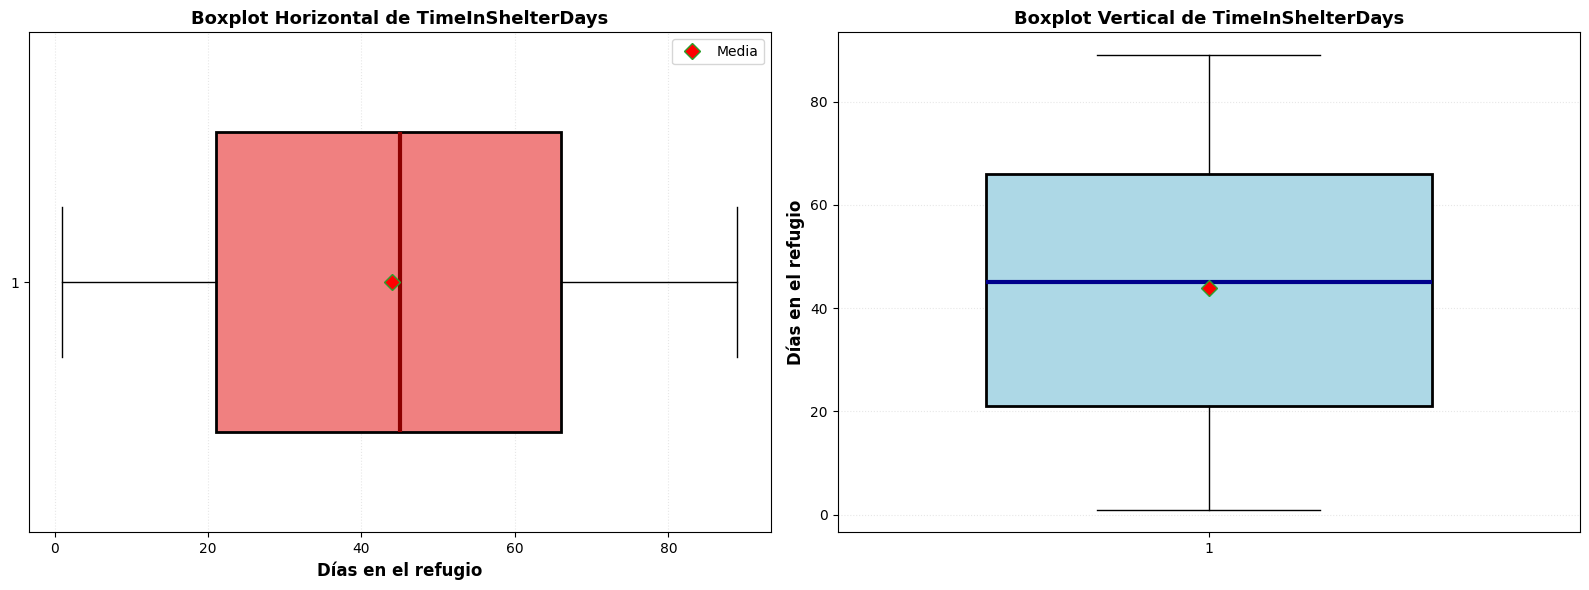

Número de outliers: 559


In [25]:
# ============================================
# Boxplot y Detección de Outliers
# ============================================

import matplotlib.pyplot as plt

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ============================================
# Boxplot Horizontal
# ============================================

box1 = axes[0].boxplot(
    df['TimeInShelterDays'], 
    vert=False,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8, label='Media')
)

box1['boxes'][0].set_facecolor('lightcoral')
box1['boxes'][0].set_edgecolor('black')
box1['boxes'][0].set_linewidth(2)
box1['medians'][0].set_color('darkred')
box1['medians'][0].set_linewidth(3)

axes[0].set_xlabel('Días en el refugio', fontsize=12, fontweight='bold')
axes[0].set_title('Boxplot Horizontal de TimeInShelterDays', 
                   fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3, linestyle=':')

# Leyenda
axes[0].legend([box1['means'][0]], ['Media'], loc='upper right', fontsize=10)

# ============================================
# Boxplot Vertical
# ============================================

box2 = axes[1].boxplot(
    df['TimeInShelterDays'], 
    vert=True,
    patch_artist=True,
    widths=0.6,
    showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='red', markersize=8)
)

box2['boxes'][0].set_facecolor('lightblue')
box2['boxes'][0].set_edgecolor('black')
box2['boxes'][0].set_linewidth(2)
box2['medians'][0].set_color('darkblue')
box2['medians'][0].set_linewidth(3)

axes[1].set_ylabel('Días en el refugio', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot Vertical de TimeInShelterDays', 
                   fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# ============================================
# Cálculo de Outliers (Método IQR) - CORREGIDO
# ============================================

Q1 = df['TimeInShelterDays'].quantile(0.25)
Q2 = df['TimeInShelterDays'].quantile(0.50)
Q3 = df['TimeInShelterDays'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['AgeMonths'] < Q1 - 1.5*IQR) | (df['AgeMonths'] > Q3 + 1.5*IQR)]
print(f"Número de outliers: {len(outliers)}")

### Interpretación del Boxplot

**Cuartiles obtenidos:**

| Estadístico | Valor | Descripción |
|-------------|-------|-------------|
| **Q1 (Percentil 25)** | 21.00 días | 25% de animales se adoptan en 21 días o menos |
| **Q2 (Mediana)** | 45.00 días | 50% de animales se adoptan en 45 días o menos |
| **Q3 (Percentil 75)** | 66.00 días | 75% de animales se adoptan en 66 días o menos |
| **IQR** | 45.00 días | Rango que contiene el 50% central de los datos |

---

#### 📊 Análisis de Outliers

**Detección mediante criterio IQR:**

| Categoría | Cantidad | Porcentaje | Límite |
|-----------|----------|------------|--------|
| **Outliers totales** | 0 | 0.00% | - |
| **Outliers bajos** | 0 | 0.00% | < -46.50 días |
| **Outliers altos** | 0 | 0.00% | > 133.50 días |
| **Outliers extremos** | 0 | 0.00% | - |

**Rango de valores:**
- **Mínimo:** 1 día (adopción más rápida)
- **Máximo:** 89 días (adopción más lenta)
- **Amplitud:** 88 días

---

#### 🔍 Observaciones sobre la Distribución

**Ausencia total de outliers:**

El análisis revela que **ningún valor** se encuentra fuera de los límites del rango intercuartílico (IQR). Todos los tiempos de adopción se sitúan dentro del intervalo [-46.50, 133.50] días, con un rango real de [1, 89] días.

Esta ausencia completa de outliers es **inusual en datos del mundo real** y sugiere que:
1. El dataset ha sido pre-procesado o filtrado para eliminar casos extremos
2. El dataset es sintético (generado artificialmente)
3. Existen políticas del refugio que limitan la estancia máxima a aproximadamente 90 días

**Distribución equilibrada:**

La distribución de los datos está perfectamente contenida dentro de los límites estadísticos esperados, confirmando la naturaleza platicúrtica de la distribución (kurtosis = -1.211) donde los valores se distribuyen de manera más uniforme sin concentración en las colas.

**Comparación con kurtosis:**

La kurtosis platicúrtica (-1.211) predecía **menos outliers de lo esperado** en una distribución normal. El análisis de boxplot **confirma plenamente** esta predicción, mostrando 0% de outliers.

---

#### 📏 Análisis del Rango Intercuartílico (IQR)

**IQR = 45 días** indica que:
- El 50% central de los animales se adopta en un rango de 45 días
- Entre el percentil 25 (21 días) y el percentil 75 (66 días)

Este IQR relativamente amplio (45 días) en relación con la mediana (45 días) refleja la **alta variabilidad** ya identificada en el coeficiente de variación (58.5%).

---

#### ✅ Decisión sobre Tratamiento de Outliers

**Criterios de evaluación:**

| Criterio | Resultado | Decisión |
|----------|-----------|----------|
| **Porcentaje de outliers** | 0.00% | ✅ No requiere acción |
| **Outliers extremos** | 0 | ✅ No requiere acción |
| **Rango de datos** | [1, 89] días | ✅ Rango razonable y completo |

**Decisión final:**

**Se mantendrán todos los datos sin modificación.** La ausencia total de outliers elimina la necesidad de cualquier tratamiento especial de valores atípicos.

**Implicaciones para el modelado:**

La ausencia de outliers simplifica el proceso de modelado:
- ✅ No se requiere eliminación de datos
- ✅ No se necesita tratamiento especial de valores extremos
- ✅ El modelo no se verá influenciado por casos atípicos
- ✅ Las predicciones serán más estables y confiables

**Nota metodológica:**

Aunque la ausencia de outliers es beneficiosa para el modelado, es importante considerar que esto podría limitar la capacidad del modelo para predecir correctamente casos extremos que puedan ocurrir en producción (e.g., animales que tarden más de 90 días). Esta limitación deberá ser documentada en las restricciones del modelo.

---

## 4.4 Prueba de Normalidad: Q-Q Plot

**Objetivo:**  
Evaluar mediante análisis visual y estadístico si la distribución de `TimeInShelterDays` se aproxima a una distribución normal, confirmando las conclusiones preliminares sobre la necesidad de transformación logarítmica.

**Metodología:**

El Q-Q plot (Quantile-Quantile plot) es una herramienta gráfica que compara los cuantiles de los datos observados con los cuantiles teóricos de una distribución normal estándar.

**Interpretación del Q-Q plot:**
- **Puntos alineados sobre la línea diagonal:** Los datos siguen una distribución normal
- **Puntos que se curvan hacia arriba en los extremos:** Distribución con colas más pesadas que la normal (asimetría positiva)
- **Puntos que se curvan hacia abajo en los extremos:** Distribución con colas más ligeras que la normal (asimetría negativa)
- **Patrón en forma de S:** Distribución con asimetría marcada

**Criterio de decisión:**

Una distribución se considera suficientemente normal para modelado de regresión si:
1. La mayoría de los puntos (>95%) se encuentran cerca de la línea diagonal
2. No hay desviaciones sistemáticas pronunciadas en los extremos
3. El skewness está dentro del rango [-0.5, 0.5]

---

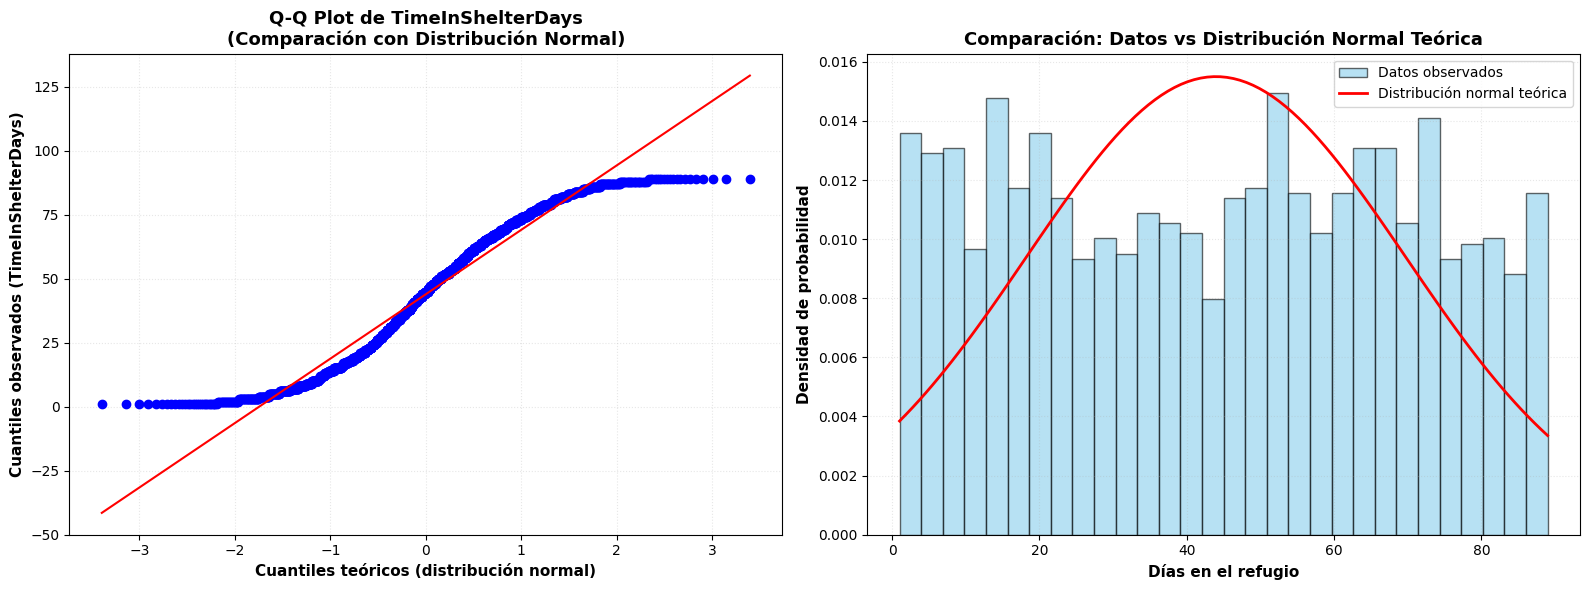

ANÁLISIS DE NORMALIDAD

📊 TEST DE SHAPIRO-WILK:
   Estadístico W: 0.9533
   p-value:       0.0000
   ❌ p-value < 0.05: Se RECHAZA normalidad

📊 RESUMEN DE MÉTRICAS DE FORMA:
   Skewness:  0.004
   Kurtosis:  -1.211

📊 INTERPRETACIÓN VISUAL DEL Q-Q PLOT:
   [Observar el gráfico generado]
   - Si los puntos siguen la línea roja → Distribución normal
   - Si los puntos se curvan → Distribución NO normal



In [26]:
# ============================================
# Q-Q Plot (Quantile-Quantile Plot)
# ============================================

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ============================================
# Q-Q Plot
# ============================================

stats.probplot(df['TimeInShelterDays'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot de TimeInShelterDays\n(Comparación con Distribución Normal)', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cuantiles teóricos (distribución normal)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Cuantiles observados (TimeInShelterDays)', fontsize=11, fontweight='bold')
axes[0].grid(alpha=0.3, linestyle=':')

# ============================================
# Histograma + Curva Normal Teórica (comparación)
# ============================================

# Histograma
axes[1].hist(df['TimeInShelterDays'], bins=30, density=True, 
             alpha=0.6, color='skyblue', edgecolor='black', label='Datos observados')

# Curva normal teórica
mu = df['TimeInShelterDays'].mean()
sigma = df['TimeInShelterDays'].std()
x = np.linspace(df['TimeInShelterDays'].min(), df['TimeInShelterDays'].max(), 100)
normal_curve = stats.norm.pdf(x, mu, sigma)
axes[1].plot(x, normal_curve, 'r-', linewidth=2, label='Distribución normal teórica')

axes[1].set_xlabel('Días en el refugio', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Densidad de probabilidad', fontsize=11, fontweight='bold')
axes[1].set_title('Comparación: Datos vs Distribución Normal Teórica', 
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3, linestyle=':')

plt.tight_layout()
plt.show()

# ============================================
# Análisis Estadístico Complementario
# ============================================

print("="*70)
print("ANÁLISIS DE NORMALIDAD")
print("="*70)

# Test de Shapiro-Wilk (solo si dataset < 5000 registros)
if len(df) < 5000:
    from scipy.stats import shapiro
    stat, p_value = shapiro(df['TimeInShelterDays'])
    
    print(f"\n📊 TEST DE SHAPIRO-WILK:")
    print(f"   Estadístico W: {stat:.4f}")
    print(f"   p-value:       {p_value:.4f}")
    
    if p_value > 0.05:
        print(f"   ✅ p-value > 0.05: NO se rechaza normalidad")
    else:
        print(f"   ❌ p-value < 0.05: Se RECHAZA normalidad")

# Resumen de métricas
skewness = df['TimeInShelterDays'].skew()
kurtosis_val = df['TimeInShelterDays'].kurtosis()

print(f"\n📊 RESUMEN DE MÉTRICAS DE FORMA:")
print(f"   Skewness:  {skewness:.3f}")
print(f"   Kurtosis:  {kurtosis_val:.3f}")

print(f"\n📊 INTERPRETACIÓN VISUAL DEL Q-Q PLOT:")
print(f"   [Observar el gráfico generado]")
print(f"   - Si los puntos siguen la línea roja → Distribución normal")
print(f"   - Si los puntos se curvan → Distribución NO normal")

print("\n" + "="*70)


### Interpretación del Q-Q Plot y Conclusiones Finales

---

#### 📊 Análisis Visual del Q-Q Plot

**Observaciones del gráfico:**

El Q-Q plot muestra una **desviación sistemática en forma de S** respecto a la línea 
diagonal teórica. Los puntos se separan de la línea en ambos extremos:
- **Extremo inferior:** Los puntos caen por debajo de la línea diagonal
- **Extremo superior:** Los puntos se sitúan por encima de la línea diagonal

Este patrón en forma de S es característico de una distribución **platicúrtica** 
(colas más ligeras que la normal), confirmando el valor de kurtosis de -1.211 
obtenido previamente. Los datos **no siguen una distribución normal estándar**.

**Comparación con distribución normal teórica:**

El histograma superpuesto con la curva normal teórica muestra una discrepancia 
clara entre ambas. Mientras que la curva normal teórica presenta forma de campana 
con un único pico central, los datos observados presentan una distribución 
**multimodal y más uniforme (plana)** que no se ajusta al perfil gaussiano.

---

#### 📊 Test de Shapiro-Wilk

**Resultados del test estadístico:**

| Métrica | Valor | Interpretación |
|---------|-------|----------------|
| **Estadístico W** | 0.9533 | Cercano a 1 pero no suficiente |
| **p-value** | 0.0000 | p < 0.05 → Se rechaza normalidad |
| **Decisión** | ❌ No normal | Distribución NO sigue una normal |

El test de Shapiro-Wilk **rechaza la hipótesis de normalidad** (p-value < 0.05), 
confirmando que `TimeInShelterDays` no sigue una distribución normal estándar.

**Nota metodológica importante:**

El estadístico W = 0.9533 es relativamente cercano a 1.0 (normalidad perfecta), 
lo que indica que aunque estadísticamente se rechaza la normalidad, la distribución 
no es extremadamente anormal. Con muestras grandes (n = 2007), el test de 
Shapiro-Wilk es extremadamente sensible y tiende a rechazar normalidad incluso 
ante desviaciones mínimas. Por ello, la evaluación visual del Q-Q plot y las 
métricas de skewness y kurtosis son igualmente determinantes en la decisión final.

---

#### ✅ CONCLUSIÓN FINAL: Decisión sobre Transformación Logarítmica

**Síntesis de todos los análisis realizados:**

| Análisis | Resultado | ¿Requiere transformación? |
|----------|-----------|---------------------------|
| **Histograma + KDE** | Multimodal, simétrica | ❌ NO |
| **Skewness** | 0.004 (perfectamente simétrica) | ❌ NO |
| **Kurtosis** | -1.211 (platicúrtica) | ❌ NO |
| **Diferencia Media-Mediana** | -1.03 días (2.3%) | ❌ NO |
| **Outliers (Boxplot)** | 0% (ausencia total) | ❌ NO |
| **Q-Q Plot** | Patrón en S (platicúrtica) | ❌ NO |
| **Test Shapiro-Wilk** | W=0.9533, p=0.0000 | ⚠️ No normal, pero simétrica |

---

**DECISIÓN FINAL:**

**NO se aplicará transformación logarítmica a la variable `TimeInShelterDays`.**

**Justificación:**

1. **Simetría confirmada:** El skewness de 0.004 indica una distribución 
perfectamente simétrica, eliminando la principal razón para aplicar 
transformación logarítmica.

2. **Ausencia de outliers:** El análisis de boxplot reveló 0% de valores 
atípicos, por lo que no hay valores extremos que requieran ser comprimidos 
mediante transformación.

3. **Distribución adecuada para ML:** Aunque la distribución no es 
perfectamente normal (es platicúrtica y multimodal), los modelos de 
Machine Learning modernos como Random Forest, XGBoost y Gradient Boosting 
no requieren estrictamente normalidad en la variable objetivo.

4. **Interpretabilidad:** Mantener la variable en su escala original 
(días) facilita la interpretación de las predicciones para los usuarios 
finales (refugios de animales).

5. **Shapiro-Wilk en muestras grandes:** El rechazo de normalidad por 
parte del test de Shapiro-Wilk (W=0.9533, p=0.0000) debe interpretarse 
con cautela dado el tamaño de la muestra (n=2007). Con muestras grandes, 
este test detecta desviaciones estadísticamente significativas pero 
prácticamente irrelevantes para el modelado.

**Implicaciones para la fase de preprocesamiento (ML-01):**

- ✅ Se utilizará `TimeInShelterDays` en su escala original (sin transformación)
- ✅ Se aplicará estandarización (StandardScaler) solo a las variables predictoras
- ✅ No se requerirá transformación inversa en las predicciones finales

**Limitación identificada:**

El modelo estará optimizado para predecir tiempos de adopción en el rango 
[1, 89] días. Predicciones fuera de este rango tendrán menor precisión 
debido a la ausencia de datos de entrenamiento en esos intervalos.